In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

sns.set_style('darkgrid')
sns.set_palette('husl')

In [2]:
pip install seaborn==3.11.4

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement seaborn==3.11.4 (from versions: none)
ERROR: No matching distribution found for seaborn==3.11.4


In [3]:
data = pd.read_csv('cleaned_bank.csv')

In [4]:
data.columns 

Index(['age', 'job', 'marital', 'education', 'balance', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')

In [5]:
data.shape

(1510, 11)

In [6]:
data.describe()

,age,balance,day,month,duration,campaign,pdays,previous
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,40.537748,1504.227152,15.522517,6.112583,742.004636,2.635099,10.374172,0.194040
std,10.923535,2572.687957,8.248089,2.713496,456.674503,2.450293,48.824822,1.214597
min,19.000000,-1129.000000,1.000000,1.000000,8.000000,1.000000,-1.000000,0.000000
25%,32.000000,129.250000,8.000000,4.000000,436.000000,1.000000,-1.000000,0.000000
50%,39.000000,620.000000,16.000000,6.000000,686.000000,2.000000,-1.000000,0.000000
75%,48.000000,1782.500000,21.000000,8.000000,989.500000,3.000000,-1.000000,0.000000
max,90.000000,34646.000000,31.000000,12.000000,3881.000000,29.000000,345.000000,29.000000


In [7]:
data.head(4)

,age,job,marital,education,balance,day,month,duration,campaign,pdays,previous
0,59,admin,married,secondary,2343,5,5,1042,1,-1,0
1,56,admin,married,secondary,45,5,5,1467,1,-1,0
2,41,technician,married,secondary,1270,5,5,1389,1,-1,0
3,55,services,married,secondary,2476,5,5,579,1,-1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1510 non-null   int64 
 1   job        1510 non-null   object
 2   marital    1510 non-null   object
 3   education  1510 non-null   object
 4   balance    1510 non-null   int64 
 5   day        1510 non-null   int64 
 6   month      1510 non-null   int64 
 7   duration   1510 non-null   int64 
 8   campaign   1510 non-null   int64 
 9   pdays      1510 non-null   int64 
 10  previous   1510 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 129.9+ KB


In [9]:
data = data.astype({'month':'object'})

data.drop(columns=['day'], inplace=True)

In [10]:
data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
month        0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64

In [11]:
#data['marital'].value_counts()

In [12]:
#encoder = LabelEncoder()
#cat_cols = ['education', 'marital', 'job']

#for col in cat_cols:
    #data[f'{col}_enc'] = encoder.fit_transform(data[col])
encoder = LabelEncoder()
cat_cols = ['education', 'marital', 'job']

for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

In [13]:
data.head(10)

,age,job,marital,education,balance,month,duration,campaign,pdays,previous
0,59,0,1,1,2343,5,1042,1,-1,0
1,56,0,1,1,45,5,1467,1,-1,0
2,41,9,1,1,1270,5,1389,1,-1,0
3,55,7,1,1,2476,5,579,1,-1,0
4,54,0,1,2,184,5,673,2,-1,0
5,42,4,2,2,0,5,562,2,-1,0
6,56,4,1,2,830,5,1201,1,-1,0
7,60,5,0,1,545,5,1030,1,-1,0
8,37,9,1,1,1,5,608,1,-1,0
9,28,7,2,1,5090,5,1297,3,-1,0


In [14]:
#data[['job','job_enc']].head(20)

In [15]:
data.drop(['pdays','previous'], axis =1, inplace= True)

In [16]:
#data = data[data['duration'] != ' ']

In [17]:
#data = data[data['duration'] !=''].copy()
#data = data.astype({'duration':'int'})

In [18]:
data.reset_index(drop=True, inplace=True)

<Axes: >

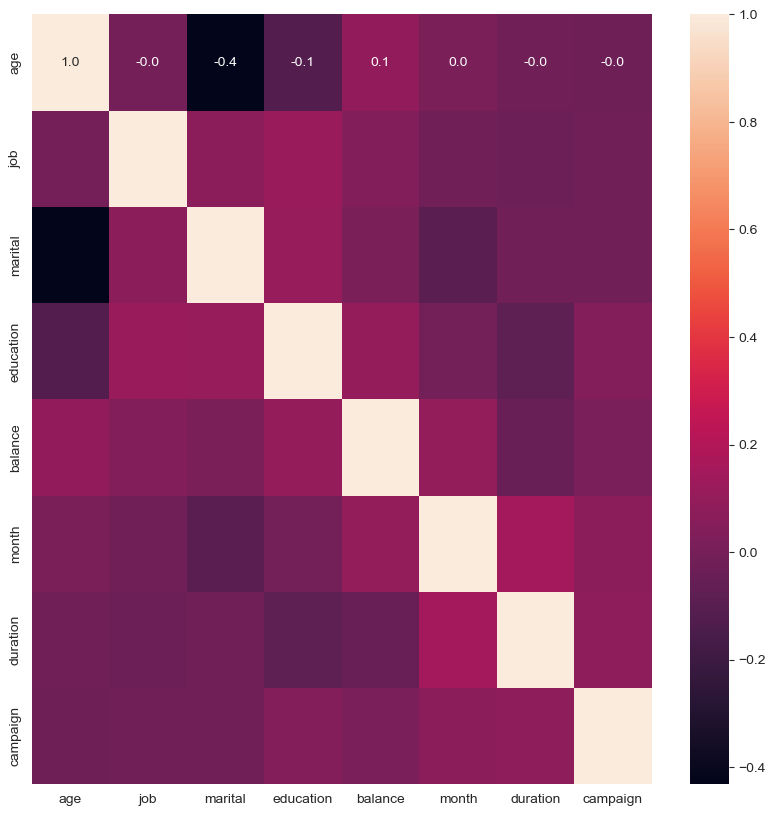

In [19]:
corr = data.corr(method='pearson')

fig = plt.ficgure(figsize= (10,10))
sns.heatmap(data = corr, fmt= '0.01f', annot=True)
#corr = data.drop(['education', 'marital', 'job'], axis = 1).corr(method='pearson')

#fig = plt.figure(figsize= (10,10))
#sns.heatmap(data = corr, annot = True)

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data = data_scaled, columns=data.columns)
data_scaled.head(3)

,age,job,marital,education,balance,month,duration,campaign
0,1.690695,-1.387024,-0.260946,-0.382191,0.326138,-0.410154,0.657131,-0.667529
1,1.415968,-1.387024,-0.260946,-0.382191,-0.567387,-0.410154,1.588080,-0.667529
2,0.042331,1.373617,-0.260946,-0.382191,-0.091074,-0.410154,1.417223,-0.667529


In [21]:
pca = PCA(n_components= 3)

data_reduced = pca.fit_transform(data_scaled)

data_reduced = pd.DataFrame(data = data_reduced, columns=['column1', 'column2', 'column3'])

data_reduced.head(3)

,column1,column2,column3
0,1.606386,-0.144147,-0.570839
1,1.503162,0.698427,-1.111185
2,0.147704,0.126865,-0.101958


Text(0.5, 1.0, 'COLUMN2 VS COLUMN3')

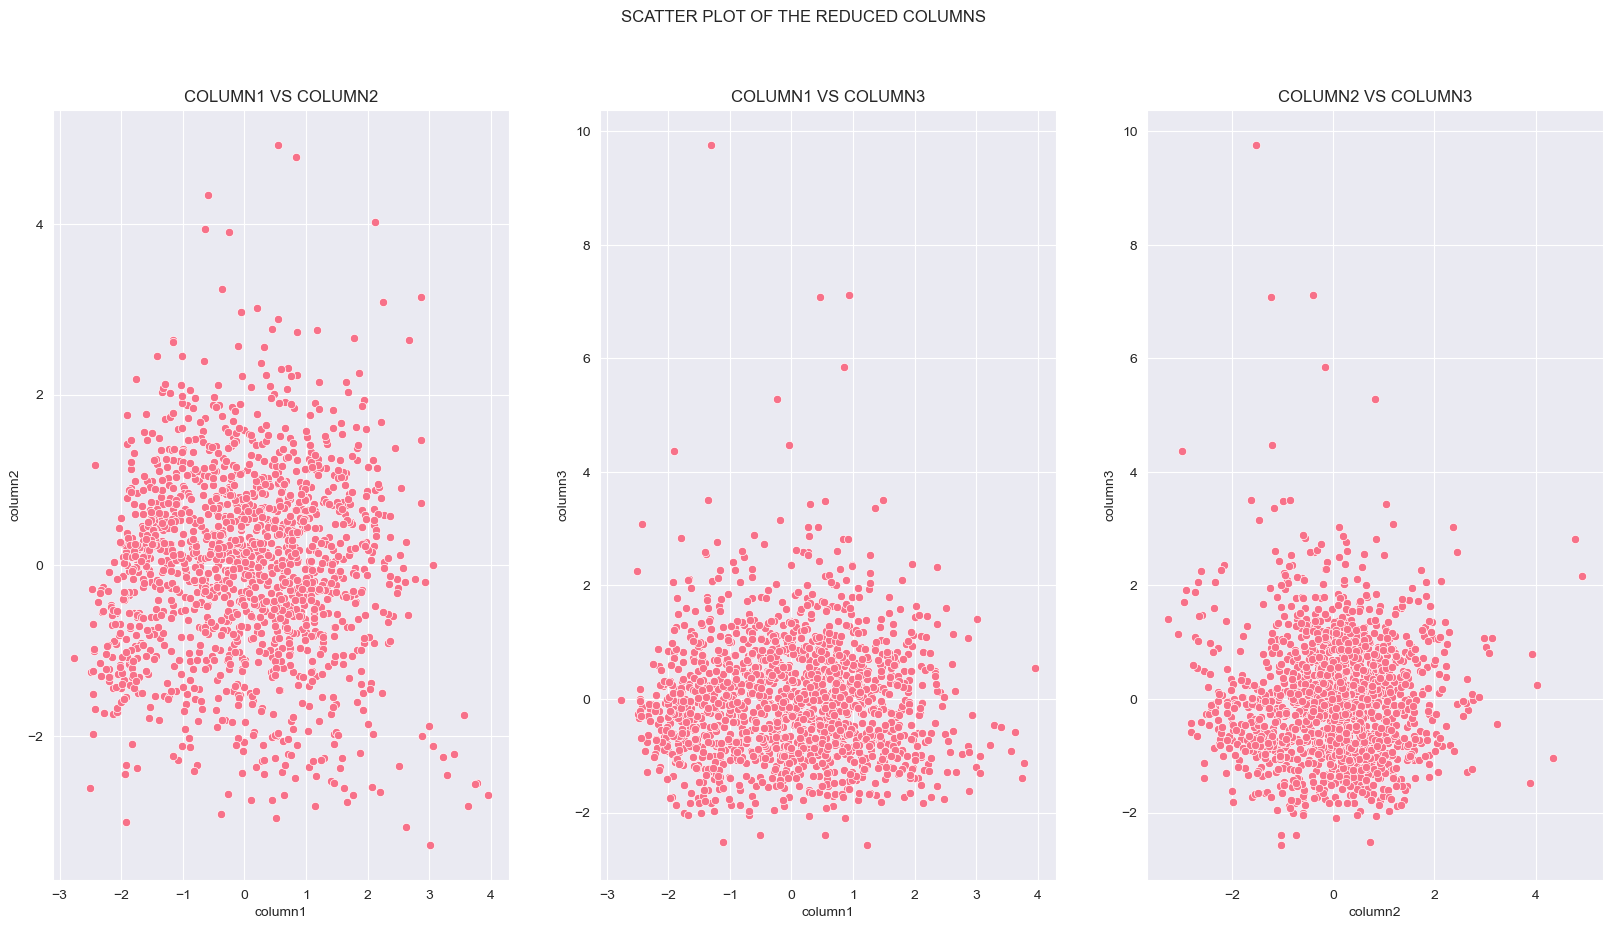

In [22]:
fig, axes = plt.subplots(1,3, figsize = (20,10))
sns.scatterplot(data = data_reduced, x = 'column1', y = 'column2', ax = axes[0])
sns.scatterplot(data = data_reduced, x = 'column1', y = 'column3', ax = axes[1])
sns.scatterplot(data = data_reduced, x = 'column2', y = 'column3', ax = axes[2])

plt.suptitle('SCATTER PLOT OF THE REDUCED COLUMNS')

axes[0].set_title('COLUMN1 VS COLUMN2')
axes[1].set_title('COLUMN1 VS COLUMN3')
axes[2].set_title('COLUMN2 VS COLUMN3')

In [23]:
kmeans = KMeans(n_clusters= 4, n_init = 'auto')

preds = kmeans.fit_predict(data_reduced)

preds

array([2, 1, 1, ..., 0, 2, 0])

In [24]:
preds

array([2, 1, 1, ..., 0, 2, 0])

Text(0.5, 0.92, '3D SCATTER PLOT OF THE THREE COLUMNS')

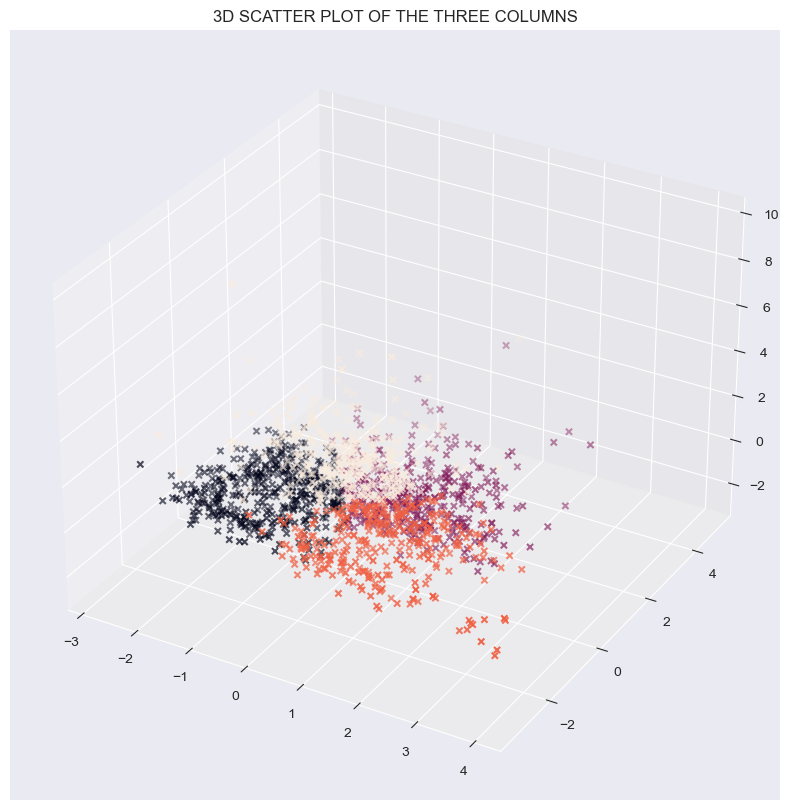

In [25]:
x = data_reduced['column1']
y = data_reduced['column2']
z = data_reduced['column3']

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x,y,z, c = preds, marker = 'x')

ax.set_title('3D SCATTER PLOT OF THE THREE COLUMNS')

In [26]:
px.scatter_3d(
    data_frame = data_reduced, x = 'column1', y = 'column2', z = 'column3',
    color = preds
)

In [27]:
data.head(4)

,age,job,marital,education,balance,month,duration,campaign
0,59,0,1,1,2343,5,1042,1
1,56,0,1,1,45,5,1467,1
2,41,9,1,1,1270,5,1389,1
3,55,7,1,1,2476,5,579,1


In [28]:
data['clusters'] = ['cluster1' if x == 0 else 'cluster2' if x == 1
                    else 'cluster3' if x == 2 else 'cluster4' for x in preds]

In [29]:
data.head(4)

,age,job,marital,education,balance,month,duration,campaign,clusters
0,59,0,1,1,2343,5,1042,1,cluster3
1,56,0,1,1,45,5,1467,1,cluster2
2,41,9,1,1,1270,5,1389,1,cluster2
3,55,7,1,1,2476,5,579,1,cluster3


<Axes: xlabel='clusters', ylabel='balance'>

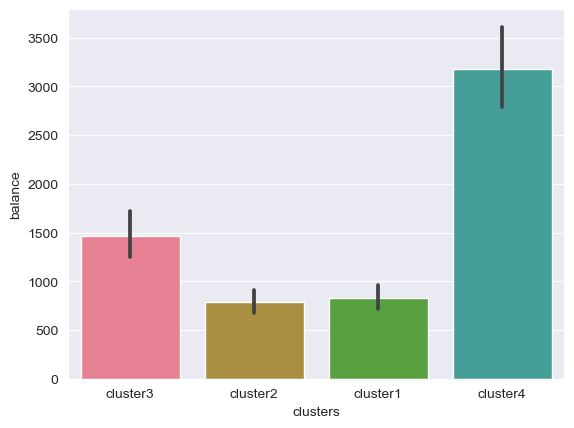

In [30]:
data['debt'] = data['balance'] + data['duration']

fig, axes
sns.barplot(data=data, x = 'clusters', y = 'balance')

<Axes: xlabel='clusters', ylabel='marital'>

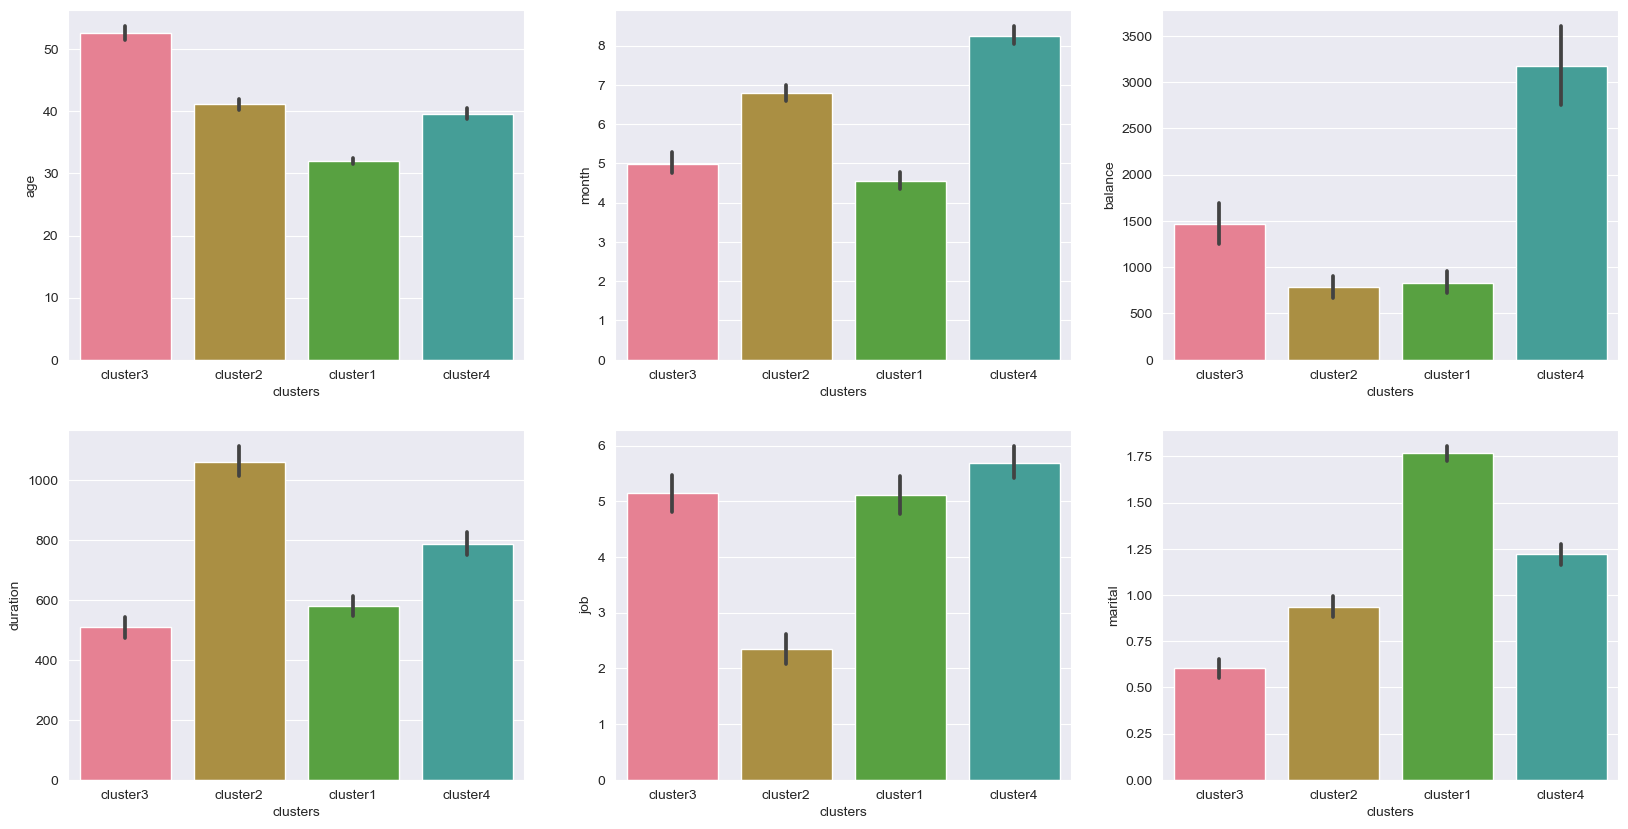

In [31]:
fig, axes = plt.subplots(2,3, figsize = (20,10))
sns.barplot(data = data, x = 'clusters', y = 'age', ax = axes[0,0])
sns.barplot(data = data, x = 'clusters', y = 'month', ax = axes[0,1])
sns.barplot(data = data, x = 'clusters', y = 'balance', ax = axes[0,2])
sns.barplot(data = data, x = 'clusters', y = 'duration', ax = axes[1,0])
sns.barplot(data = data, x = 'clusters', y = 'job', ax = axes[1,1])
sns.barplot(data = data, x = 'clusters', y = 'marital', ax = axes[1,2])

In [32]:
data[data['clusters'] == 'cluster2']

,age,job,marital,education,balance,month,duration,campaign,clusters,debt
1,56,0,1,1,45,5,1467,1,cluster2,1512
2,41,9,1,1,1270,5,1389,1,cluster2,2659
11,30,1,1,1,309,5,1574,2,cluster2,1883
12,29,4,1,2,199,5,1689,4,cluster2,1888
18,41,0,1,1,55,5,1120,2,cluster2,1175
...,...,...,...,...,...,...,...,...,...,...
1458,29,7,0,1,84,4,1101,2,cluster2,1185
1467,44,0,0,1,0,4,1594,1,cluster2,1594
1483,57,7,1,0,491,4,1217,3,cluster2,1708
1499,35,9,1,1,545,4,1579,1,cluster2,2124


#### MODEL EVALUATION AND INTERPRETATION

This dataset is for bank customers showing their age ranges, job descriptions, marital status, educational qualifications, balance due on their loans and the duration of the balance due. The dataset cluster can help the bank target their different customers with adverts and financial offers based on this analysis

1. The Dataset has 11 Columns and 1510 Rows
2. Some columns were dropped as they played no significant role in this analysis
3. The remaining columns were reduced into 3 variables (columns) using Principal Component Analysis (PCA).
4. The resultant data was segmented into 4 clusters.
5. The analysis showed that the customers in Cluster 2 have more debts/balance while those in Clusters 1,3 & 4 have the lowest debt/balance

RECOMMENDATION
Based on the analysis, Cluster 4 are low risk loan customers and can be targeted with more adverts and financial offers.
Same goes for Clusters 1 & 3
Customers in cluster 2 are high risk clients. They can be targeted with financial offers but the loan has to be minimal over the shortest possible repayment period to avoid bad loans